<a href="https://colab.research.google.com/github/maxinelanier/Seattle-Weather/blob/main/Data_Preparation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this notebook is to process and clean seattle_rain.csv and stl_rain.csv, two weather data sets, in order to prepare them for analysis on whether it rains more in Seattle or St. Louis. 



**Source**: seattle_rain.csv and stl_rain.csv were both both accessed using the NOAA Climate Data website https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND online search tool.

The data sets include measurements of daily precipitation in Seattle and St. Louis from 2018-2022.

Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

Load the Seattle data set

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

Data is read into the data frame df_seattle.

Load the St. Louis data set

In [3]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

Data is read into the data frame df_stlouis.

## Contents

Inspect the contents of each data set.

Use .head() to get an initial idea of the contents of each data set.

In [4]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [5]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


First 5 entries of df_stlouis and df_seattle are displayed.

It can be seen that the St. Louis data set has observations that begin earlier than the Seattle data set. 

Use .info() to see more information about the contents of each data frame.

In [6]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [7]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Information about each data frame is displayed, including the number of entries, columns, and non-null values in each column, data type of each column, and memory usage. 

The number of observations in the St. Louis data set is larger than the number of observations for Seattle. 

Compare columns of the two data sets.

In [8]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [9]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

Names of the columns of each data set are displayed. It can be seen that they are not the same, as the Seattle data set has more columns than St. Louis.  

Investigate the different stations from which precipitation data is recorded for each city.

.unique() displays each unique reporting station for a data set. .value_counts() displays the number of observations from each unique reporting station.

In [10]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [11]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [12]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [13]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

The St. Louis data set has precipitation values reported from many stations, while Seattle has only one station. This is one of the reasons for the difference in number of total observations.

## Data type conversions

For each data set, change the data type of the "DATE" column from object to datetime to ensure accuracy in future plots. 

In [14]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [15]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [16]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [17]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [18]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [19]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  54574 non-null  object        
 1   NAME     54574 non-null  object        
 2   DATE     54574 non-null  datetime64[ns]
 3   DAPR     1166 non-null   float64       
 4   MDPR     1163 non-null   float64       
 5   PRCP     53143 non-null  float64       
 6   SNOW     33167 non-null  float64       
 7   SNWD     12835 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.3+ MB


The date is now stored as a datetime for each data set, and is displayed in this form.

## Are the data suitable for answering the question?

Brief data visualization of the daily precipitation values for Seattle and St. Louis to check if data is fit to find whether it rains more in Seattle or St. Louis, and if not, to see what needs adjustment.

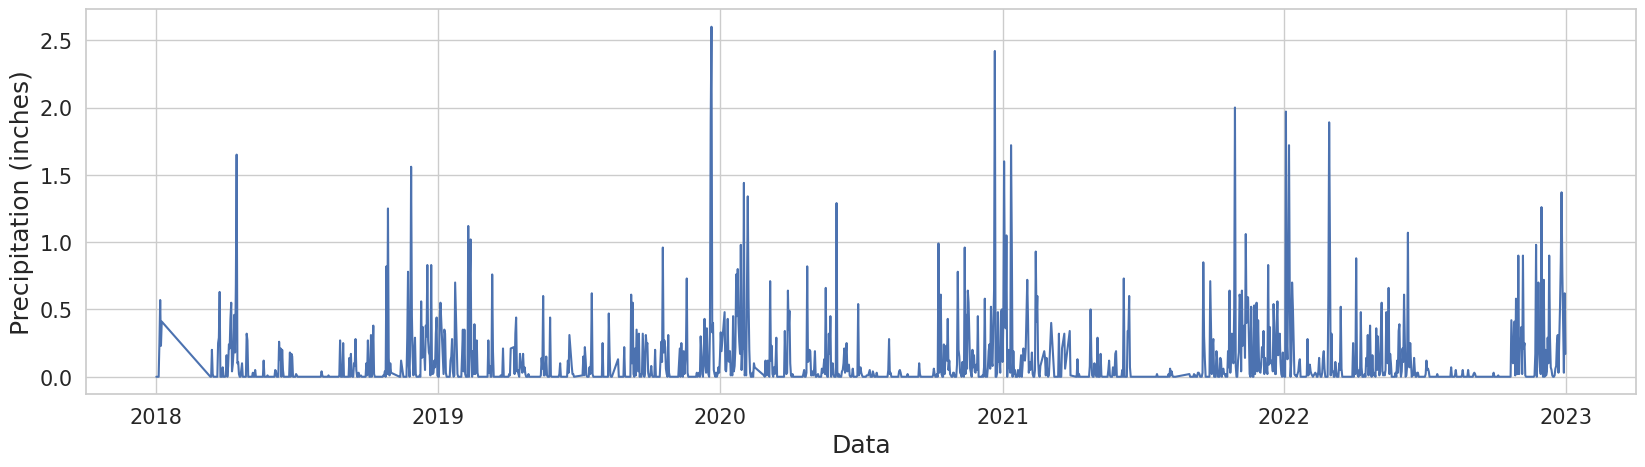

In [20]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Data', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

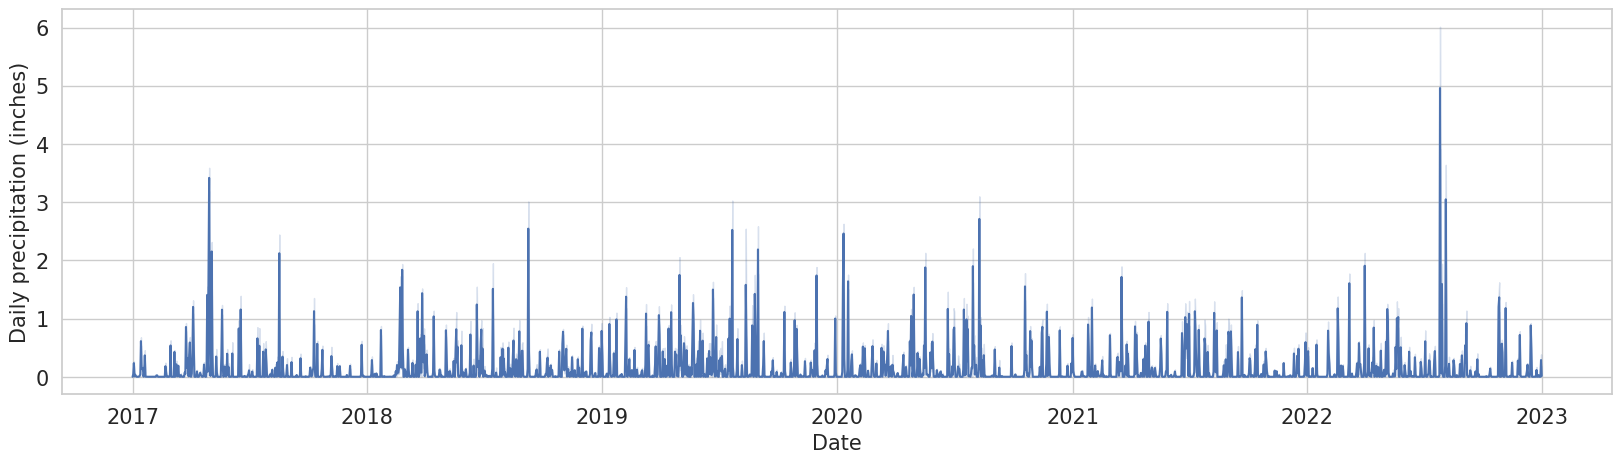

In [21]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
plt.tick_params(labelsize=15);

The plot of Seattle's daily precipitation data shows an out of place diagonal line in 2018. This alerts us that there are missing values in the data set. 

In [22]:
df_seattle.head(30)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


Looking at the dates of the first 30 entries of the Seattle data set, one can see that there are no entries from February of 2018. Missing values will need to be accounted for to get an accurate answer to the question. 

## Select relevant subsets of the data

Get rid of observations from the St. Louis data set from before 2018.

In [23]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [24]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


St. louis data now begins in 2018.

Limit the St. Louis data to only observations reported from the airport station.

In [25]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [26]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

In [27]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0


## Identify any missing values

.info() and .isna() allow us to check if any values in the data set are not a number or are simply missing.

In [28]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


In [29]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

St. Louis data set does not contain any NaNs. There are also 1826 observations, which is the correct number, as five years of days with one leap year ends up being 1826 days.

Do the same tests on the Seattle data set.

In [30]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [31]:
df_seattle.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

The Seattle data set does not have 1826 observations, so it can be seen that some dates are missing. This will be resolved in a few steps after joining the two data sets into one data frame.

## Join data frames keeping `DATE` and `PRCP` columns

Join the St. Louis data set with the Seattle data set, including only the DATE and PRCP data. Rename the resulting data frame.

In [32]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

In [33]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


In [34]:
df.tail()

,DATE,PRCP_x,PRCP_y
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.31,0.62
1825,2022-12-31,0.00,0.17


The resulting data frame has, for each date, a precipitation value for St. Louis, and one for Seattle, unless that date was omitted from the Seattle data set. PRCP_x is St. Louis and PRCP_y is Seattle. The importance of using a left join according to St. Louis is that this means no dates will be missing, as only Seattle is missing entries.

## Create a tidy data frame with columns for city and precipitation

At the moment, the data frame has one row for each date, and a different value for each city, separated into columns. 

In [35]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Melt is used to turn this data frame into one where the precipitation value for each city on any given date is given its own row, with a column that specifies the city that observation came from.

In [36]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [37]:
df

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,0.00
...,...,...,...
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62


The resulting data frame has double the rows, as each date gets two rows, one for each city.

### Rename columns or values to follow best practices

Rename PRCP_x to STL (St. Louis) and PRCP_y to Seattle. 

In [38]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [39]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [40]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [41]:
df.tail()

,DATE,CITY,PRCP
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


The resulting data frame is more clear to read with the city names. It will be easier to read and use later on if the columns are renamed into lowercase letters, as well as getting rid of abbreviations. 

In [42]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

In [43]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [44]:
df.tail()

,date,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


## Fix missing values

With the above combined data frame that includes St. Louis and Seattle's data, it is simple to identify where data is missing from Seattles observations because there exist 2 rows for each date within the time period.

To fill in any missing values, one can use the average (across all other years) precipitation measurement for that specific day of the year. 

First, add a column to the data frame that identifies the day of the year for each row, with possible values of 1-365.

In [45]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [46]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.0,1
1,2018-01-02,STL,0.0,2
2,2018-01-03,STL,0.0,3
3,2018-01-04,STL,0.0,4
4,2018-01-05,STL,0.0,5


Above is the resulting data frame, with the added "day of year" column. Below, use .isna() to find the rows with no precipitation value.

In [47]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


To use the above information, the index of each of these rows with a missing value is found. 

In [48]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [49]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

The result is a list of the index of each row without a precipitation value. To fix these, make use of the column which shows the day of the year.

Using all the available Seattle data, find the average precipitation value for each day of the year in Seattle.

In [50]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [51]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


The resulting data frame contains an average precipitation value for each day of the year, averaged across all the year. This can be used to fill in rows with no precipitaiton value.

Use the mean_day_precipitation data frame, the list of indices indentifying missing values, and enumerate to replace each missing value. 

In [52]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Use .isna()==True to check if any missing values remain within df dataframe.

In [53]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


No days were found to have a missing precipitation value. 

## Create relevant derived variables as new columns

Isolating the month number for eacu observation will make analysit easier.

In [54]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [55]:
df

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.00,1,1
1,2018-01-02,STL,0.00,2,1
2,2018-01-03,STL,0.00,3,1
3,2018-01-04,STL,0.00,4,1
4,2018-01-05,STL,0.00,5,1
...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12


## Export the clean .csv file

In [56]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>